어느 병원에서 흡연자들을 대상으로 하루 흡연량이 폐암 발생 후 사망시점에 미치는 영향을 알아보기 위해 조사한 것이다.
    
||||||||||||
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|하루 흡 연 수(daily)|5|7|9|11|13|15|17|19|21|23|
|기간(단위: 월)(period)|36|30|25|23|20|15|12|9|5|3|
||||||||||||


In [8]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore')

In [9]:
#make a data set, 
daily =[5,7,9,11,13,15,17,19,21,23]
period=[36,30,25,23,20,15,12,9,5,3]
smoke= pd.DataFrame({'daily':daily,'period':period})
smoke.head()

,daily,period
0,5,36
1,7,30
2,9,25
3,11,23
4,13,20


1.
산점도를 그리고, 표본상관계수를 추정하고 상관관계가 존재하는지 검정하시오

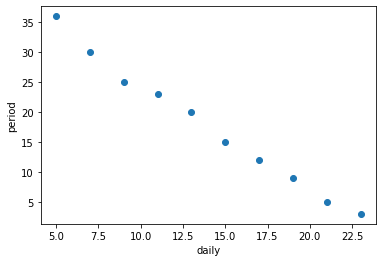

In [15]:
#산점도
import matplotlib.pyplot as plt
plt.scatter(daily,period)
plt.xlabel('daily')
plt.ylabel('period')
plt.show()

일반적으로 상관계수라고 하면 피어슨 상관계수를 말한다.
np.corrcoef(x,y)

In [16]:
#두변수의 상관계수 확인 (correalation)
np.corrcoef(daily,period)[0,1]

-0.9949423927596839

음의 상관 관계를 갖는다, 이는 Daily 가 증가 할수록 PERIOD 가 작아진다.

2.
분산분석표를 작성하고 추정된 회귀직선이 유의한지 유의수준 5% 하에서 검정하시오.

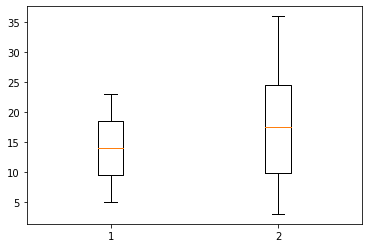

In [14]:
plot_data =[daily,period]
plt.boxplot(plot_data)
plt.show()

* 평균 값의 차이가 의미가 있어 보이나?

In [7]:
np.cov(daily,period) # 공분산

array([[ 36.66666667, -65.55555556],
       [-65.55555556, 118.4       ]])

두 변수가 같은 방향으로 변화 한다.

In [13]:
np.cov(daily)

array(36.66666667)

In [24]:
# 분산 분석표를 작성 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('period ~ daily',smoke).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
daily,1.0,1054.848485,1054.848485,784.892897,2.845249e-09
Residual,8.0,10.751515,1.343939,NaN,NaN


p-value 가 0.05 보다 작다.

In [27]:
#회귀 모델 확인
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 period   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     784.9
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.85e-09
Time:                        15:24:27   Log-Likelihood:                -14.552
No. Observations:                  10   AIC:                             33.10
Df Residuals:                       8   BIC:                             33.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8303      0.966     44.351      0.000      40.603      45.057
daily         -1.7879      0.064    -28.016      0.000      -1.935      -1.641
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.368
Skew:                           0.463   Prob(JB):                        0.832
Kurtosis:                       2.842   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared 0.99 :모형의 적합도, Period 의 분산을 daily가 약 99%를 설명한다.

Prob(F-stattics) :2.85e-09
회귀 모형의 유의미 정도 이며 0.05 인 5% 보다 작으므로, 회귀 모형이 유의미 하다라는것을 보여준다.

Adj. R-squared:0.989

독립변수가 여러 개인 다중회귀분석에서 사용
독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정
서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다

About Coefficients : 절편 추정 42.83 daily가 0일때 period 값
Daily 의 계수 추정치 : 기울기 -1.7 즉  daily 1 증가 할때 마다 -1.7 로 period 감소

* Period =   42.83 -1.788*daily 

결정 계수 ( R squared ) : 0.99

회귀분석을 통해 구한 결정계수는, 추정된 회귀식이  자료를 99% 설명한다 라는 의미를 보여준다.

회귀모형 추정식을 쓰고, 의미를 설명하시오.

추정식:
y = 42.83 - 1.788x 
(y=period(폐암 발생 후 사망 시점), x = daily(하루 흡연 수))

* 하루 흡연 수가 10인 경우, 폐암 발생 후 예상되는 사망시점은? 


In [30]:
m = 10
y = 42.83 - 1.788 * x 
print(y)

24.95


In [31]:
# y = 24.95 (1 month)

# 1year 12 month =  365 day , 1 month estimate 30.417 days

#if 1 month = 30.417days
#    0.95 month =  30.417 *0.95 days

print(0.95 * 30.417)

28.89615


예상되는 사망시점

폐암 발생 후 24.95 월후 

폐암 발생 후 약 2 년 28일 


  9. 최소자승 해 풀기 (Compute the Least-squares solution)

     : m, c = np.linalg.lstsq(A, y, rcond=None)[0]


In [50]:
x=daily
y=period
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m=m.round(4)
c=c.round(4)
print(m,c)

-1.7879 42.8303


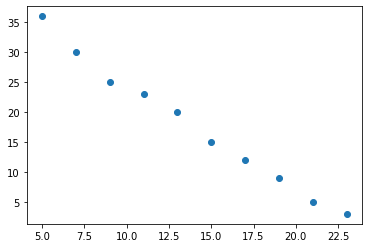

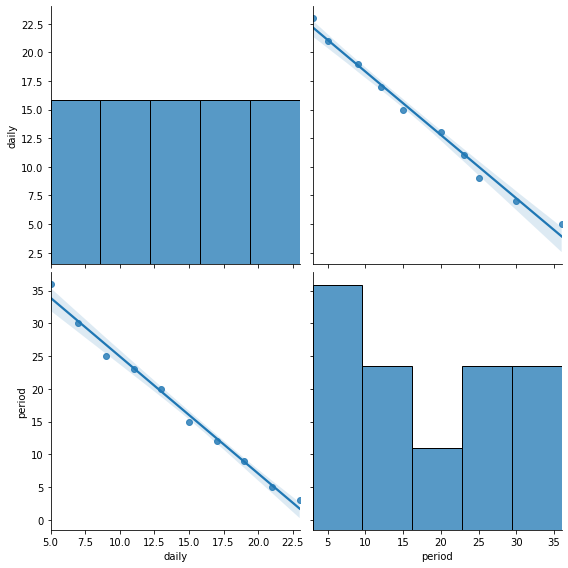

In [54]:
plt.scatter(smoke.daily,smoke.period)
sns.pairplot(smoke,kind='reg',height=4)